In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [54]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [56]:
# Read the data from a csv file to a pandas dataframe and check the head of it

my_data = pd.read_csv(r'C:\Users\Sotiris\Desktop\Python\Copenhagen_Houses_Project\houses\src\data\house_results.csv')
my_data.head()

,id,latitude,longitude,propertyType,priceChangePercentTotal,energyClass,price,rooms,size,lotSize,floor,buildYear,city,zipCode,street,squaremeterPrice,basementSize
0,1831310,55.68588,12.48374,5,0,C,774539,2,60,0,1.0,1936,Vanløse,2720,"Grønnehøj 21, 1. th.",0,0
1,1831910,55.71205,12.53673,5,0,D,836537,2,63,0,3.0,1942,København NV,2400,Tagensvej 196D 3. tv.,0,0
2,1831873,55.70668,12.53652,3,0,C,1748000,1,38,0,2.0,1935,København NV,2400,"Teglbrændervej 4, 2. tv.",46000,0
3,1831872,55.69444,12.49196,3,0,C,1995000,2,57,0,1.0,1936,Vanløse,2720,"Markskellet 17, 1. tv.",35000,0
4,1831884,55.71659,12.45988,3,0,D,1995000,3,62,0,3.0,1954,Brønshøj,2700,Frederikssundsvej 416 3. th.,32177,0


In [57]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2394 non-null   int64  
 1   latitude                 2394 non-null   float64
 2   longitude                2394 non-null   float64
 3   propertyType             2394 non-null   int64  
 4   priceChangePercentTotal  2394 non-null   int64  
 5   energyClass              2372 non-null   object 
 6   price                    2394 non-null   int64  
 7   rooms                    2394 non-null   int64  
 8   size                     2394 non-null   int64  
 9   lotSize                  2394 non-null   int64  
 10  floor                    1553 non-null   float64
 11  buildYear                2394 non-null   int64  
 12  city                     2394 non-null   object 
 13  zipCode                  2394 non-null   int64  
 14  street                  

In [58]:
my_data.describe()

,id,latitude,longitude,propertyType,priceChangePercentTotal,price,rooms,size,lotSize,floor,buildYear,zipCode,squaremeterPrice,basementSize
count,2.394000e+03,2394.000000,2394.000000,2394.000000,2394.000000,2.394000e+03,2394.000000,2394.000000,2394.000000,1553.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,1.772316e+06,55.673677,12.561005,2.954470,-1.875104,5.279347e+06,3.252715,107.936926,547.413952,2.678042,1910.329156,2199.804511,53320.891395,7.074353
std,2.440212e+05,0.029438,0.050176,1.302548,4.725638,3.737206e+06,1.596081,613.061696,9520.877484,1.747056,233.479794,418.495147,17321.965878,28.318105
min,2.001000e+03,55.565250,12.455270,1.000000,-55.000000,1.500000e+05,0.000000,22.000000,0.000000,1.000000,0.000000,1051.000000,0.000000,0.000000
25%,1.794288e+06,55.658995,12.530810,3.000000,-4.000000,2.922500e+06,2.000000,60.000000,0.000000,1.000000,1904.000000,2000.000000,43039.000000,0.000000
50%,1.810487e+06,55.676820,12.564150,3.000000,0.000000,4.299500e+06,3.000000,85.000000,0.000000,2.000000,1936.000000,2300.000000,51666.500000,0.000000
75%,1.825445e+06,55.696628,12.592870,3.000000,0.000000,6.295000e+06,4.000000,118.000000,0.000000,4.000000,1970.000000,2500.000000,62474.250000,0.000000
max,1.832152e+06,55.872710,13.760720,12.000000,147.000000,4.800000e+07,30.000000,30000.000000,435000.000000,14.000000,2024.000000,2900.000000,147465.000000,774.000000


In [59]:
# Create a function which will help us clean our data

def clean_data(df):

    # Make a copy of the original dataframe
    df_copy = df.copy()

    # Drop the unnecessary columns

    df_copy = df_copy.drop(['id','city','street','squaremeterPrice','priceChangePercentTotal'],axis=1)

    # Drop the null energy classes

    df_copy = df_copy.dropna(subset=['energyClass'])

    # Drop the unknown energy classes
    df_copy = df_copy[df_copy['energyClass'] != '-']

    # Correct the energy classes
    replace_dict = {'A':'A20','I':'A20','J':'A15','K':'A10','L':'A15','M':'A20'}
    df_copy['energyClass'] = df_copy['energyClass'].str.upper()
    df_copy['energyClass'] = df_copy['energyClass'].replace(replace_dict)

    # Drop the houses with build year 0
    df_copy = df_copy[df_copy['buildYear'] != 0]

    # Drop the houses with over 1000 square meters
    df_copy = df_copy[df_copy['size'] < 1000]

    # Return the transformed dataframe
    return df_copy

In [60]:
# Convert the custom function into a transformer

clean_data_transformer = FunctionTransformer(clean_data)

# Transform/clean the data

my_data = clean_data_transformer.transform(my_data)

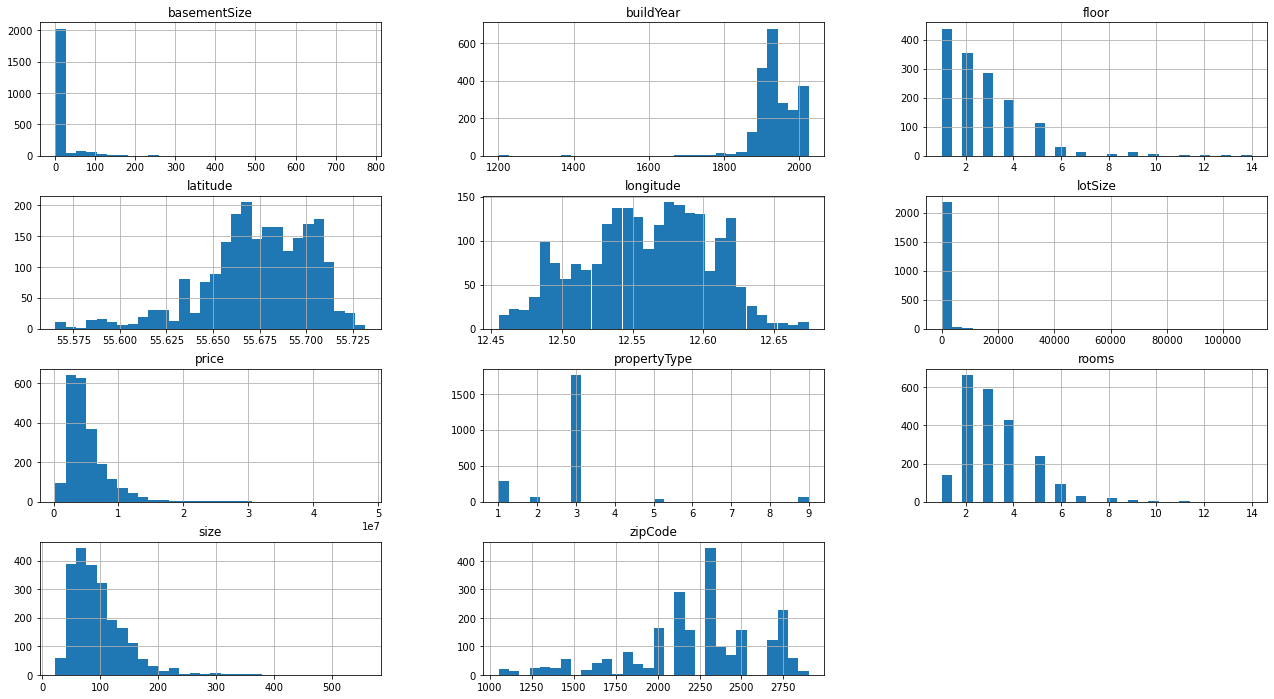

In [61]:
# Histograms of the numerical data

my_data.hist(bins= 30,figsize=(22,12));

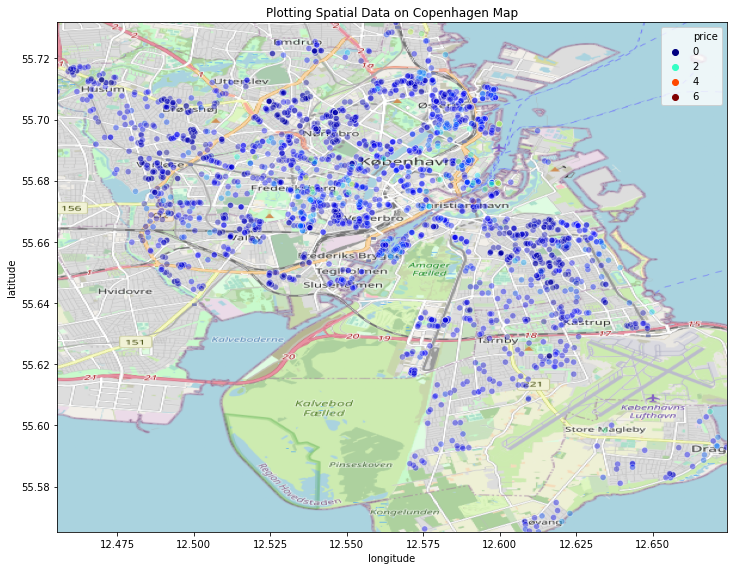

In [62]:
# Save the min and max of the coordinates in our cleaned dataframe

long_max = my_data['longitude'].max()
long_min = my_data['longitude'].min()
lat_max = my_data['latitude'].max()
lat_min = my_data['latitude'].min()

# Make a box of coordinates

BBox = ((long_min,long_max,lat_min,lat_max))

# Read the map of Copenhagen

path = 'C:/Users/Sotiris/Desktop/cph_map.png'
img = plt.imread(path)

# Create the plot

fig, ax = plt.subplots(figsize = (12,12))
sns.scatterplot(x='longitude',y='latitude',data=my_data,alpha=0.4,palette='jet',hue='price')
ax.set_title('Plotting Spatial Data on Copenhagen Map')
ax.set_xlim(long_min,long_max) # Set the x-axis to be between long_min and long_max
ax.set_ylim(lat_min,lat_max) # Set the y-axis to be between lat_min and lat_max
ax.imshow(img, extent = BBox, aspect= 'equal');

In [63]:
# Split the data using train/test split

X = my_data.drop('price',axis=1)
y = my_data['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [64]:
# Create a preprocessor consisting of numerical and categorical transformers and make a pipeline

numeric_features = ['latitude','longitude','propertyType','rooms','size','lotSize','floor','buildYear','zipCode','basementSize']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',missing_values = np.nan, fill_value = 0)),
    ('scaler', StandardScaler())
])

categorical_features = ['energyClass']
categorical_transformer = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder(categories=[['A20','A15','A10','B','C','D','E','F','G']]))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

reg = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', RandomForestRegressor())
])

# Fit the model and make predictions

reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

# Compute the score, which is the r-squared value for this particular model

reg.score(X_test,y_test)


0.7860689581605541

In [65]:
# Make a dataframe consisting of both real and predicted values

df1 = pd.DataFrame(predictions,columns=['Predicted_Prices'])
test = y_test.reset_index()
test = test.rename(columns={'price':'Real_Prices'})
df2 = test.drop('index',axis=1)
df = df1.join(df2)

# Plot real VS predicted values

px.scatter(df)